                           
                           **This barn contains code for the following concepts**

 
**Priliminary analysis on raw data**
1. word counts
2. character count
3. average word length
4. stop words count
5. hashtags and @ count
6. check if number digits is present in tweet
7. upper case word count subject to condition



**Preprocessing and cleaning - stage 1**
1. lower case conversion
2. contraction to expansion
3. count emails and remove them
4. count urls and remove it
5. remowing reweet characters
6. Special Chars removal or punctuation removal
7. remove multiple spaces
8. Remove HTML tags
9. handle accented data
10. position based replacements in string

**preprocessing and cleaning - stage 2 -  using spacy**

1. remove stop words
2. to convert words into its root form using lemma
3. to convert words to its root form using porter stemmer
4. most common words removal(not stop words)
5. most rare words removal
6. word cloud visualization
7. spelling correction
8. translation and language detection

**Advanced text processing - stage 3 feature extraction**

1. POS tagging
2. sentence boundary detection
3. dependency parsing
4. named entities recogonition using spacy
5. detecting nouns
6. n grams
7. BOW and TF-IDF
8. word2vec
9. data frame of word2vec
10. Advanced text preprocessing - stage 4: rule based matching in spacy
11. token matcher
prerequisites
    1. first example
    2. second example
    3. third example
    4. phrase matcher
    5. entity matcher
12. Machine learning models for text classification



# pre requisties 


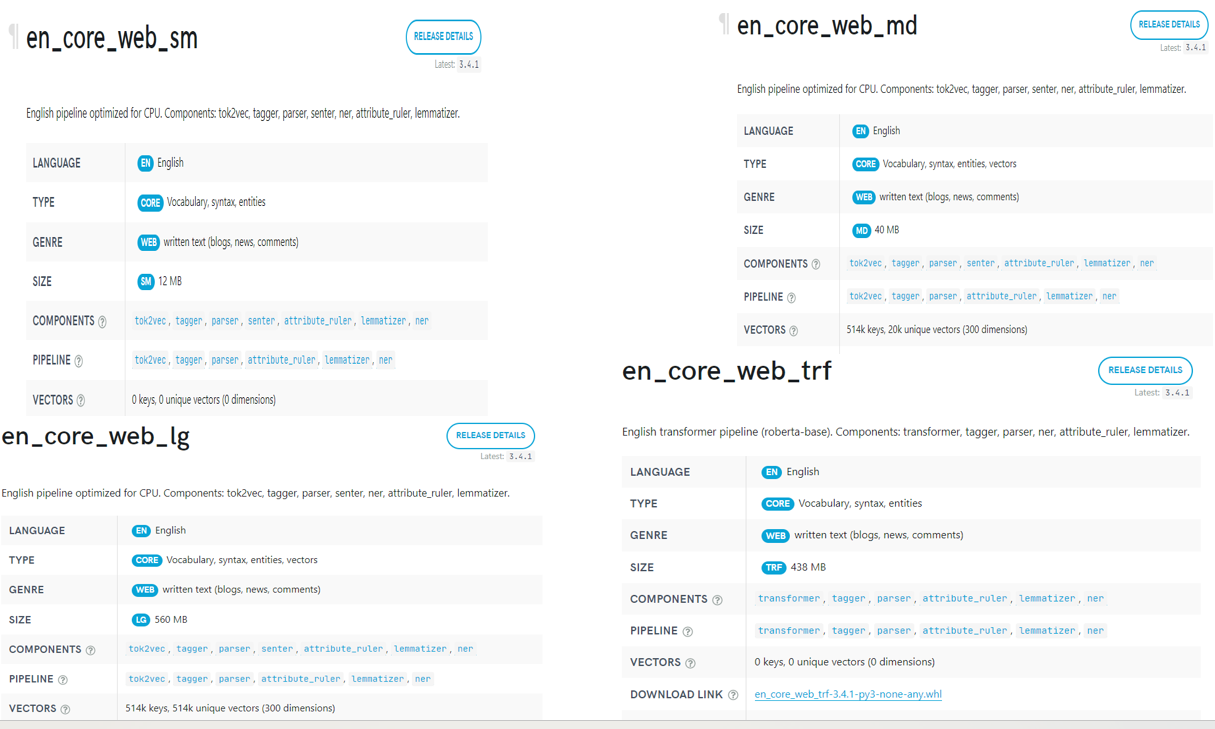

In [ ]:
# pip install -U spacy
# pip install -U spacy-lookups-data  ( wat is lookups data)?
# python -m spacy download en_core_web_sm (small)
# python -m spacy download en_core_web_md  (medium)
# python -m spacy download en_core_web_lg   (large 1 gb)

In [ ]:
from pprint import pprint # for pretty printing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy import displacy  # for displaying NER results beaultifullu
nlp = spacy.load('en_core_web_sm')

#import spacy.cli
#spacy.cli.download("en_core_web_lg")
#nlp = spacy.load("en_core_web_lg")

In [ ]:
!pip install textacy
#from spacy import textacy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 5.2 MB/s 
     |████████████████████████████████| 2.0 MB 57.8 MB/s 
     |████████████████████████████████| 1.6 MB 43.1 MB/s 
     |████████████████████████████████| 132 kB 67.2 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73980 sha256=333587ac1d39c4cee39ba24c68eeecb45610eb2c138e438eaf6e26bfd2665833
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [ ]:
import re

In [ ]:
from bs4 import BeautifulSoup  # for scraping wbsite and handling parsing html and xml documents

In [ ]:
import unicodedata # to handle accented data (José João)

In [ ]:
from wordcloud import WordCloud  # for word cloud visualization
import matplotlib.pyplot as plt
%matplotlib inline 
 # to ensure that the plot displays when you run relevaant code. it was used before it was not displaying sometimes 

In [ ]:
# !pip install -U textblob
# !python -m textblob.download_corpora
from textblob import TextBlob # for spelling correction


In [ ]:
import nltk #for n grams  much faster than user defined function, check that section for proof. but for large size data fails for some reason . may be chunking will work
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install googletrans==3.1.0a0 # use the laster version, else it ll display group error
from googletrans import Translator, constants

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 1.4 MB 10.9 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=94063dad89c76846670e0c9af7040a631e855e215551d426b2dce3612429bb8d
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # for BOW
from sklearn.feature_extraction.text import TfidfVectorizer # for tf idf

In [ ]:
import numpy as np

# read files


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/twitter16m.csv', encoding = 'latin1', header = None)

# use index_col=0 if it already has column name

In [ ]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# organize data

0. [ [ ] ] creates a data frame. [ ]  creates series
1. selecting certain columns
  -   df = df[[5, 0]]
2. remaining columns 
  -   df.columns = ['tweets', 'sentiment']
3. renaming index with cloumn
  - pd.DataFrame(text_counts, columns = cv.get_feature_names_out(),index=x)
4. sampling based on condition 
  -   df0 = df[df['sentiment']==0].sample(2000)
5. drop or remove certain columns 
  - dfr_feat = df.drop(labels=['twitts','sentiment','emails'], axis = 1).reset_index(drop=True) or inplace=true

6. size of data frame
  - df.shape
7. review null values
  - df.isnull().sum() 
8. drop null values
  - df.dropna(subset=['Review Text','Division Name'],inplace = True) 
9. column to list
  - ' '.join(df['review'].tolist())

In [ ]:
df = df[[5, 0]] # extract use full columns and set it as df
df.columns = ['tweets', 'sentiment'] # rename columns based on order
df.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [ ]:
df['sentiment'].value_counts() # count frequency , histogram of discrete data

0    800000
4    800000
Name: sentiment, dtype: int64

In [ ]:
sentiment_map = {0: 'negative' , 4:'positive'} # for mapping labels

#Priliminary analysis on raw data


## word counts


take every row of tweets column and convert into str( sometweets may be in num and number cannot be split.)

then convert the tweet(sentence) into list of words

den calculate number of words in every tweet(i.e. len of list)

create a new column called " word_counts and copy values there

In [ ]:
df['word_counts'] = df['tweets'].apply(lambda x: len(str(x).split()))
df.head()
df[df['word_counts']>10].head()

,tweets,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
4,"@nationwideclass no, it's not behaving at all....",0,21
7,@LOLTrish hey long time no see! Yes.. Rains a...,0,22


## character count

take every row of tweets column and calculate the length of the string. (note we converted the tweet to str in previous row

create a new column called " char_counts and copy values there

In [ ]:
df['char_counts'] = df['tweets'].apply(lambda x: len(x))
df.head()

,tweets,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


## average word length

for every row of tweet column, split tweets into list of words, calculate no of characters in every word.

sum up = length of characters( we have to ignore spaces thats why below code instead of len(x)/len(x.split)
avg word ;en = length of characters /no of words

copy that to new column = avg_word_len

In [ ]:
df['avg_word_len'] = df['tweets'].apply(lambda x: sum([len(t) for t in x.split()])/len(x.split()))
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


## stop words count

cannot remove stop words in summarization applications.

can remove in classifications based on application (always check this)

In [ ]:
# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS

print(STOP_WORDS)

{'show', 'therefore', 'latter', 'and', 'without', 'eight', 'n‘t', 'too', 'thus', 'as', 'has', 'whereafter', 'be', 'through', '’s', 'call', "'re", 'thence', 'regarding', 'will', '’d', 'first', 'next', 'further', 'behind', 'whither', 'alone', 'he', 'see', 'become', 'beforehand', 'hundred', 'made', 'serious', 'because', 'her', 'several', 'now', 'anything', 'might', 'together', 'some', 'fifty', 'thereby', 'who', 'formerly', 'whenever', 'that', 'although', 'moreover', 'ca', 'since', 'yourselves', 'others', 'yours', 'meanwhile', 'make', 'sixty', 'there', 'afterwards', 'his', 'nowhere', 'third', 'it', 'should', 'myself', 'up', 'please', 'indeed', "n't", 'would', 'get', 'never', 'one', '‘ve', 'every', 'less', "'s", 'twelve', 'else', 'she', 'somehow', 'each', 'for', 'when', 'someone', 'sometimes', 'thereupon', 'whereby', 'across', 'move', 'still', 'empty', 'bottom', "'m", 'until', 'side', 'six', 'beside', 'off', 'used', 'against', 'seemed', '‘m', 'down', 'the', 'often', 'various', 'can', 'are',

for every row in tweets column,

for every word in row, check if its in stop words, if it is put it in list

finally alculate the length of list

In [ ]:
df['stop_words_len'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))
df.head()


,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


In [ ]:
x= " my name is @shiva"

[t for t in x.split() if t.startswith('@')]

['@shiva']


## hashtags and @ count

In [ ]:
df['hashtags_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


In [ ]:
x="my name is shiva"
x.split()

['my', 'name', 'is', 'shiva']

## check if number digits is present in tweet

In [ ]:
df['numerics_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


## upper case word count subject to condition

why counting upper case words, amy be important: its generally used to put emphasis on certain things. (like saying its a bad food in all caps)

for every word in every tweet of tweets column, if word is in upper case and length of the tweet is more than three , copy and paste in upper_counts column.

reason for len(x)> 3,
some tweets may either contain just emoji or may contain only three or less letters etc. example I

In [ ]:
df.loc[96]['tweets']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

In [ ]:

df['upper_counts'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))
df[df['upper_counts']==0].head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
5,@Kwesidei not the whole crew,0,5,29,4.800000,3,0,1,0,0
6,Need a hug,0,3,11,2.666667,1,0,0,0,0
8,@Tatiana_K nope they didn't have it,0,6,36,5.000000,3,0,1,0,0


# Preprocessing and cleaning - stage 1

to analyse how dirty - clean data is and to do basic things like the ones shown below

## lower case conversion

convert the original data frame itself

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: x.lower())
df.head(5)


NameError: ignored

## contraction to expansion

can't to cannot 

i'll to i will 

u to you

etc

we can define a custom dictionary to do this task

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"u": "you",
"ur": "your",
"n": "and"}

the working can be understood with below two sections.

if that word exists in dictionary, it ll replace the word with replacement. (ele with ele)

reason for not using (dict.get(ele)), can be understood with 2nd section

In [ ]:
samp_dict={"hi":1,"bye":"2"}

print(samp_dict.get("bi","k"))
print(samp_dict.get("bi"))

k
None


In [ ]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: " ".join(contractions.get(ele,ele) for ele in x.split()))
df.head()

CPU times: user 8.73 s, sys: 220 ms, total: 8.95 s
Wall time: 9.09 s


,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1


## count emails and remove them

need to work on regex.

but essentially ,using re.findall

for every row of tweets column, find all emails and organize them in list

count all

re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x)

then use re.sub




In [ ]:
df['emails'] = df['tweets'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[]
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[]
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[]
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[]
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[]


now count all the emails

In [ ]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))
df.head()


,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0


create a binary column, returning true if email count is greater than zero.

then return the rows subject to that condition (only top 5 subjected to this condition)

In [ ]:
df[df['emails_count']>0].head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :|...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all the...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that's kinda sad lol add me...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error ...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


using re.sub

remove mail id's from the tweets and

substitute emaild with " " from x

re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', **x**)


In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))

## count urls and remove it

need to work on regex.

but essentially ,using re.findall

for every row of tweets column, find all urls and organize them in list.

re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x)

count it

then use re.sub

In [ ]:
df['urls_flag'] = df['tweets'].apply(lambda x: (re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))
df['urls_flag_count'] = df['tweets'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))


In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))

In [ ]:
df[df['emails_count']>0].head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag,urls_flag_count
4054,i want a new laptop. hp tx2000 is the bomb. :|...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1,[],0
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1,[],0
8496,@alexistehpom really? did you send out all the...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1,[],0
10290,@laureystack awh...that's kinda sad lol add me??,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1,[],0
16413,"@jilliancyork got 2 bottom of it, human error ...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1,[],0


## remowing reweet characters

find "rt" from x. SINCE RETWEETS ARE ALSO CONSIDERED TWEETS HERE

In [ ]:
df['retweets'] = df['tweets'].apply(lambda x:len( re.findall('RT', x)))
df[df['retweets']>0].head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag,urls_flag_count,retweets


## Special Chars removal or punctuation removal

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))


In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('[][]', '', x))


In [ ]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag,urls_flag_count,retweets
0,switchfoot - awww that is a bummer you should...,0,19,115,5.052632,4,0,1,0,1,[],0,"[(http, twitpic.com, /2y1zl)]",1,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0,[],0,0


## remove multiple spaces

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x.split()))

## Remove HTML tags

example

In [ ]:
x = '<html><h2>Thanks for watching</h2></html>'
BeautifulSoup(x, 'lxml').get_text() 

# input x
# use lxml module for parsing xml and html files. 
# get actual data from the html xml tags using get_tet()
# parsing means geting usefull data

'Thanks for watching'

In [ ]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

CPU times: user 5min 30s, sys: 25.1 s, total: 5min 55s
Wall time: 5min 58s


## handle accented data

To handle 

José João Caminhão Cachaçaria Pêssegó'

normalization  provides a unique number for every character, no matter what platform, device, application or language

instead of NFKD you can use below based on requirement
https://dencode.com/string/unicode-normalization

we are asking to ignore ascii rules for encoding and utf-8 for decoding. 

have to understand more about this

In [ ]:
x ='José João Caminhão Cachaçaria Pêssegó'
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

remove_accented_chars(x)

'Jose Joao Caminhao Cachacaria Pessego'

In [ ]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

CPU times: user 1.97 s, sys: 160 ms, total: 2.13 s
Wall time: 2.15 s


## position based replacements in string

In [ ]:
s = '1 2 3 4'
replaced_string = s.translate(str.maketrans({'1': 'I', '2': 'put', '3': 'this', '4': 'here'}))
print(replaced_string)


# preprocessing and cleaning - stage 2 using spacy

to start cleaning data and to prepare for modelling. done based on application. use wisely



order :: text split ->punctuation ->etc

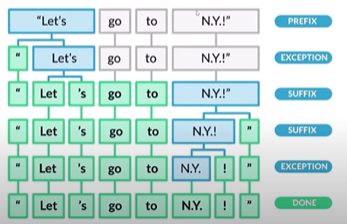

## remove stop words

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

## to convert words into its root form using lemma

1) should be done based on application. for summarization , converting to root word alters meaning. 

2) for classification you may use it. but think and then use


3) check prerequisites for libraries

4) **load sm, md ,lg based on need . the more the size, the more processing it does**

5) always convert to lower case before applying lemma or stopwords

6) Original Word ---> Root Word (lemma)      Feature

7.1) meeting    --->   meet          (core-word extraction)

7.2) was        --->    be    (tense conversion to present tense)

7.3) mice       --->   mouse   (plural to singular)

8) **check if "be" etc below. u may need to add remove more things based on need**

In [ ]:
nlp = spacy.load('en_core_web_sm') # note even dot is concidered token in spacy

In [ ]:
x = 'i you he she they is am are'
doc=nlp(x) # converts str to tokens 
print(doc)
type(doc)

i you he she they is am are


spacy.tokens.doc.Doc

In [ ]:
x_list = []
doc = nlp(x)
for token in doc:
  lemma = (token.lemma_) # lematises the token 
  print(lemma) # prints "be" forms pronoun etc


I
you
he
she
they
be
be
be


 this **works**

In [ ]:
def convert_2_root(x):
  if x.lemma_=="-PRON" or "be":
    return x.text
  return x.lemma_
 
# note : if it says token not defined for doing using token.lemma_ in doc, because they arent in same format

In [ ]:
x='kenichan dived times ball managed save 50 rest'
" ".join(list(map(convert_2_root,nlp(x))))

'kenichan dived times ball managed save 50 rest'

In [ ]:
x = 'i you he she they is am are'
" ".join(list(map(convert_2_root,nlp(x))))

'i you he she they is am are'

In [ ]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: " ".join(list(map(convert_2_root,nlp(x)))))

In [ ]:
#convert_2_root('kenichan dived times ball managed save 50 rest')
#convert_2_root('i you he she they is am are')

## to convert words to its root form using porter stemmer

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
ps = PorterStemmer()

In [ ]:
words =['changing','changes','changed','change','study','studying']

In [ ]:
for word in words:
  print(word,":",ps.stem(word))

changing : chang
changes : chang
changed : chang
change : chang
study : studi
studying : studi


## most common words removal(not stop words)

process may vary for each project. check once

1.   join all rows of tweets column into single string (STR)
2.   split the string to list of words
3.   use pd.series to count value of each word (result are descending)
4.   go through each word in the (STR) and join if not in the most frequent




In [ ]:
text = ' '.join(df['tweets'])
text = text.split()
freq_comm = pd.Series(text).value_counts()


In [ ]:
f20 = freq_comm[:20] # take top twenty occuring words

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))


 **OR**

In [ ]:
from collections import Counter

text = """Imran is adamant about his two main demands. First, elections should be held at the beginning of next year and the new government should be given the right to the head of the government to decide the new chief of the army. Actually, Imran is sure that he will become the head of the new government in Pakistan, that is, the Prime Minister. The tenure of the current Army Chief, General Qamar Javed Bajwa, ends on November 29 this year."""
word_freq = Counter(text.split())
word_freq.most_common(5)


[('the', 11), ('of', 5), ('new', 3), ('government', 3), ('Imran', 2)]

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(text)
words=[token.text for token in doc if not token.is_stop and not token.is_punct]
word_freq = Counter(words)
word_freq.most_common(5)

[('new', 3), ('government', 3), ('Imran', 2), ('year', 2), ('head', 2)]

## most rare words removal

use the  cell(1) from common words removal section . 

by applying the same for  the list based on last twenty words

In [ ]:
rare20 = freq_comm[-20:]

## or 

# rare = freq_comm[freq_comm.values == 1]  # use this when you want meet certain condition


In [ ]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

## word cloud visualization

1. use the cell(1) from cmmon words removal section
2. take the first 20000 words from text

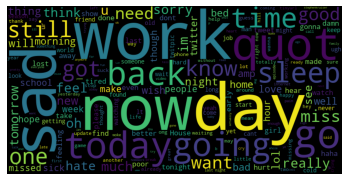

In [ ]:
# !pip install wordcloud
x = ' '.join(text[:20000]) #note : text is list of words. and x is a string
wc = WordCloud(width = 800, height=400).generate(x)  # width , height refer to size of the image . check the method for more functionalities
plt.imshow(wc)
plt.axis('off') 
plt.show()

## spelling correction

note that this may may not correct every mistake. can only correct minor mistakes on mostly used words



*   example : carr will be replaced to care , but that could also mean carry 
*   List item



In [ ]:
x = 'tanks forr waching this vidio carr'

In [ ]:
# !pip install -U textblob
# !python -m textblob.download_corpora
x=TextBlob(x).correct() # pass the correccted variable to the same variable
x


TextBlob("Breaking News: Donald Plump, the president of the USA is looking to sign a deal to mine the moon")

In [ ]:
df['tweets'] = df['tweets'].apply(lambda x:TextBlob(x).correct() )

## translation and language detection

for short forms refer the link
https://www.loc.gov/standards/iso639-2/php/code_list.php


In [ ]:
x= 'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'


# from googletrans import Translator, constants
# from pprint import pprint
# init the Google API translator
translator = Translator()
translation=translator.translate("Hola Mundo", dest="ar")
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")+--

Hola Mundo (es) --> مرحبا بالعالم (ar)


# Advanced text processing - stage 3 feature extraction

## POS tagging 
all pos tags
https://universaldependencies.org/u/pos/



spacy encodes all string into has values to reduce memory and increase efficiency.

with _ provides actual value, else hash value

**Available attributes**

https://spacy.io/api/token#attributes

- text : the original text
- lemma : the base form of the word
- POS: the simple UPOS part -of-speech tag
- Tag: the detailed part - of -speech tag
- Dep: Syntactic dependency i.e. the nature of tokens (root, conj, etc)
- Shape : The word shape (Ab : Xx). number with d
- is alpha : does the token contains only alphabetic characters
- is stop: is the token part of a stop list i.e. the most common words of a language 


In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
text ="Apple is looking at buying u.k. startup for $1 billion"
doc= nlp(text)

In [ ]:
a=list(doc)
type(a[0])

spacy.tokens.token.Token

In [ ]:
!pip install beautifultable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from beautifultable import BeautifulTable
table=BeautifulTable()


In [ ]:
table.columns.header = ['text','POS','Dep','TAG','Shape','is_alpha', 'is_stop']
for token in doc:
  table.rows.append([token.text,token.pos_,token.dep_,token.tag_,token.shape_,token.is_alpha,token.is_stop])

- https://universaldependencies.org/u/pos/
- http://relearn.be/2015/training-common-sense/sources/software/pattern-2.6-critical-fork/docs/html/mbsp-tags.html

- https://gist.github.com/sebleier/554280

In [ ]:
print(table)


+---------+-------+----------+-----+-------+----------+---------+
|  text   |  POS  |   Dep    | TAG | Shape | is_alpha | is_stop |
+---------+-------+----------+-----+-------+----------+---------+
|  Apple  | PROPN |  nsubj   | NNP | Xxxxx |    1     |    0    |
+---------+-------+----------+-----+-------+----------+---------+
|   is    |  AUX  |   aux    | VBZ |  xx   |    1     |    1    |
+---------+-------+----------+-----+-------+----------+---------+
| looking | VERB  |   ROOT   | VBG | xxxx  |    1     |    0    |
+---------+-------+----------+-----+-------+----------+---------+
|   at    |  ADP  |   prep   | IN  |  xx   |    1     |    1    |
+---------+-------+----------+-----+-------+----------+---------+
| buying  | VERB  |  pcomp   | VBG | xxxx  |    1     |    0    |
+---------+-------+----------+-----+-------+----------+---------+
|   u.k   | PROPN |   dobj   | NNP |  x.x  |    0     |    0    |
+---------+-------+----------+-----+-------+----------+---------+
|    .    

## sentence boundary detection

detecting sentence in paragraph

In [ ]:
para ="""In the clip, the man first opens the front of the scooter using a tool. Further into the video, he can be seen taking out the snake using his hands. As he keeps pulling the snake out, there is no end to it. Have a look"""

In [ ]:
doc=nlp(para)

In [ ]:
sentences =list(doc.sents)

In [ ]:
len(sentences)

4

In [ ]:
for i,sentence in enumerate(sentences):
  print(i,sentence)

0 In the clip, the man first opens the front of the scooter using a tool.
1 Further into the video, he can be seen taking out the snake using his hands.
2 As he keeps pulling the snake out, there is no end to it.
3 Have a look


## dependency parsing

http://robotics.usc.edu/~gkoch/DependencyManual.pdf

In [ ]:
import spacy

In [ ]:
from spacy import displacy

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
text ="Apple is looking at buying u.k. startup for $1 billion"
doc= nlp(text)

In [ ]:
options ={"compact": True,"distance":50  }
displacy.render(doc,style='dep',jupyter=True,options=options)

## named entities recogonition using spacy

second cell is better. its a pre trained pipe line. but note : transformer based ner is even better, but takes lots of time to train

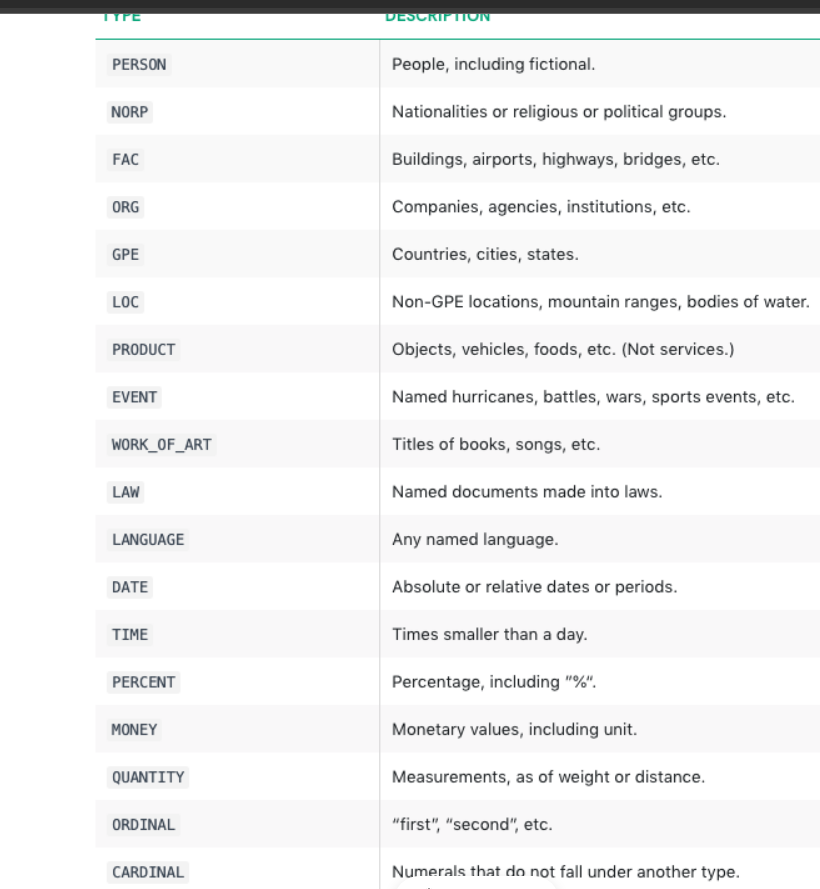

In [ ]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"

doc = nlp(x)
for ent in doc.ents: # ents ->entities
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_))) 
    
# ent.text -> actual text
# ent.label -> what entity it belongs to
# spacy.explain(explains the label) 
# gpe means geo politicla entity

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [ ]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"
doc = nlp(x)
displacy.render(doc, style="ent",jupyter=True) 
# use this when using jupyter,colab
# use render in colab, serve in vs code ( check once if this is true)

## detecting nouns

In [ ]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"
doc = nlp(x)

for noun in doc.noun_chunks:  #.noun_chunks contains list of all nouns  
    print(noun)

# or just use below

#list(doc.noun_chunks)


News
Donald Trump
the president
the USA
a deal
the moon


## n grams


if a sentence contains "l" words and it we need n gram, the number of sentences we get is (l-n+1))

when compared with applying function on  spacy based tokens. the default textblob is much faster

ex: my name is shiva (tri gram)
1. my name is
2. name is shiva

**for n grams  much faster than user defined function, check that section for proof. but for large size data fails for some reason . may be chunking will work**
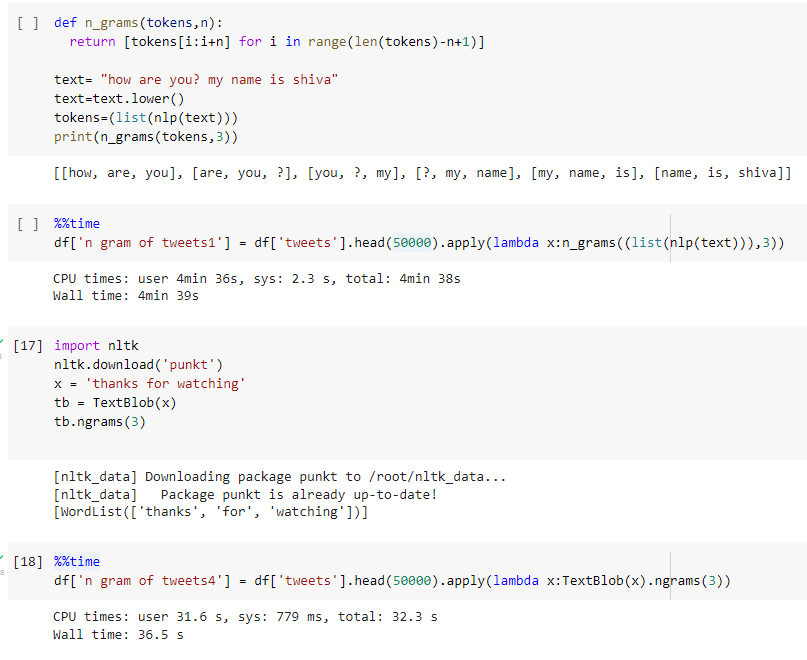

In [ ]:

x = 'thanks for watching'
tb = TextBlob(x)
tb.ngrams(3)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[WordList(['thanks', 'for', 'watching'])]

In [ ]:
%%time
df['n gram of tweets'] = df['tweets'].apply(lambda x:TextBlob(x).ngrams(3))

CPU times: user 31.6 s, sys: 779 ms, total: 32.3 s
Wall time: 36.5 s


## BOW and TF-IDF

representation of text that describes the occurrence of words within a document
1. format idea for ngram_range=(1,2)  - > need unigram and bigram
2. format idea for ngram_range = (2,2) - > need only bigram

In [ ]:
x = ['this is first sentence this is', 'this is second', 'this is last']
# u can create a list of tweets using x= list(df['tweets])
# u can also pass stop_words='english' below
cv = CountVectorizer(analyzer='word',ngram_range=(2,2),stop_words='english') #for character n gram u can use analyser = "char"
text_counts = cv.fit_transform(x).toarray()
text_counts
#cv.get_feature_names_out()

array([[1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 4, 0, 1, 0, 1, 0, 1,
        4, 1, 1, 1, 1, 2],
       [0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0,
        2, 1, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0,
        2, 0, 1, 1, 0, 1]])

In [ ]:
cv.get_feature_names_out()

array([' f', ' i', ' l', ' s', ' t', 'as', 'ce', 'co', 'd ', 'e ', 'ec',
       'en', 'fi', 'hi', 'ir', 'is', 'la', 'nc', 'nd', 'nt', 'on', 'rs',
       's ', 'se', 'st', 't ', 'te', 'th'], dtype=object)

interpreting output of .toarrary and get feature names out
1. the size of list in the .to arrarys -> (num of tweets*voc size )
2. the values in each element of .to array is the count of of particular word in that tweet.
3. the position indexes can be mateched directly to the get feature names list

In [ ]:
bow = pd.DataFrame(text_counts, columns = cv.get_feature_names_out())
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [ ]:
m_a_uni =bow.sum().sort_values(ascending = False)[:9]
m_a_uni.plot.bar()

In [ ]:
bb = bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [ ]:
reqd_Index = bow[bow['first']>0].index.tolist()
reqd_Index


[0]

In [ ]:
b = np.where(bow>0)
print(b)

(array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2]), array([0, 1, 4, 5, 1, 3, 5, 1, 2, 5]))


In [ ]:
bow.loc[bow['first']>0]

,first,is,last,second,sentence,this
0,1,2,0,0,1,2


In [ ]:
tfidf = TfidfVectorizer() # initialize tf idf
x_df = pd.DataFrame(tfidf.fit_transform(x).toarray(), columns=cv.get_feature_names_out())
x_df

,first,is,last,second,sentence,this
0,0.456882,0.539684,0.000000,0.000000,0.456882,0.539684
1,0.000000,0.453295,0.000000,0.767495,0.000000,0.453295
2,0.000000,0.453295,0.767495,0.000000,0.000000,0.453295


In [ ]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

## word2vec



1. spacy uses word2vec
2. contains vector for more than 200 million words
3. however check if token contains vector

In [ ]:
doc = nlp('thank you! dog cat lion dfasaa')
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
dfasaa True


In [ ]:
sample_token=nlp("lion")
sample_token.vector.shape

(300,)

In [ ]:
sample_token.vector

NameError: ignored

similar words mean having high values 

In [ ]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

thank thank 1.0
thank you 0.26585453748703003
thank ! 0.29259735345840454
thank dog 0.061790868639945984
thank cat 0.04215025529265404
thank lion -0.13132092356681824
thank dfasaa 0.0

you thank 0.26585453748703003
you you 1.0
you ! 0.3429550528526306
you dog 0.34409627318382263
you cat 0.27984926104545593
you lion 0.05796932056546211
you dfasaa 0.0

! thank 0.29259735345840454
! you 0.3429550528526306
! ! 1.0
! dog 0.2505742013454437
! cat 0.20256751775741577
! lion -0.032366640865802765
! dfasaa 0.0

dog thank 0.061790868639945984
dog you 0.34409627318382263
dog ! 0.2505742013454437
dog dog 1.0
dog cat 0.8220816850662231
dog lion 0.29493075609207153
dog dfasaa 0.0

cat thank 0.04215025529265404
cat you 0.27984926104545593
cat ! 0.20256751775741577
cat dog 0.8220816850662231
cat cat 1.0
cat lion 0.3854507803916931
cat dfasaa 0.0

lion thank -0.13132092356681824
lion you 0.05796932056546211
lion ! -0.032366640865802765
lion dog 0.29493075609207153
lion cat 0.3854507803916931
lion lion 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  This is separate from the ipykernel package so we can avoid doing imports until


### data frame of word2vec

In [ ]:
def get_vec(x): # to get matrix of size 300,no of words
    doc = nlp(x)
    return doc.vector.reshape(1, -1) # convert to 300,1

  # will give vector of size 300 for every tweet using average method

In [ ]:
%%time 
# better assign it to new data frame dft
dfr['vec'] = df['tweets'].apply(lambda x: get_vec(x))

In [ ]:
w2v_mat = np.concatenate(dfr['vec'].to_numpy(), axis = 0)
w2v_mat.shape


In [ ]:
df_w2vec=pd.DataFrame(w2v_mat)

#Advanced text preprocessing - stage 4:  rule based matching in spacy

https://spacy.io/usage/rule-based-matching

https://demos.explosion.ai/matcher

better compared to regular expression based matching.

there are three kinds of matching methods available ass follows:
- token matcher
- phrase matcher
- entity ruler

## token matcher

operates on tokens. ex: lower,length,lemma,shape is_punct,is_digit etc

#### prerequisites

In [ ]:
from spacy.matcher import Matcher
from spacy.tokens import Span # allows accessing span . doc[1:2]

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
#reading text data
fileObject = open("/content/drive/MyDrive/Colab Notebooks/alice.txt", "r")
text = fileObject.read()

In [ ]:
doc=nlp(text) # tokenize

### first example

FIRST DICTIONARY for first word: find lower case of ALICE and it should be a proper noun
SECOND DICTIONARY for second word subjected to first: find auxilary word



In [ ]:
pattern_verb =[{"LOWER":'alice',"POS":"PROPN"},{'POS':'AUX'}] #USE "TEXT":Alice to match exact text
matcher =Matcher(nlp.vocab) # creating space for vocubalry
matcher.add("alice_aux",[pattern_verb]) #could be any string. generally used to show what you are trying to print
matches = matcher(doc) #pass data for vocab creation

In [ ]:
for match_id,start,end in matches:
  string_id = nlp.vocab.strings[match_id]
  span=doc[start:end]
  print(match_id,string_id,start,end,span.text)

13711828750694328625 alice_aux 330 332 Alice was
13711828750694328625 alice_aux 1041 1043 Alice had
13711828750694328625 alice_aux 1595 1597 Alice was
13711828750694328625 alice_aux 1762 1764 Alice had
13711828750694328625 alice_aux 2094 2096 Alice had
13711828750694328625 alice_aux 2231 2233 Alice was
13711828750694328625 alice_aux 4882 4884 Alice had
13711828750694328625 alice_aux 6246 6248 Alice would
13711828750694328625 alice_aux 8381 8383 Alice was
13711828750694328625 alice_aux 8752 8754 Alice was
13711828750694328625 alice_aux 10259 10261 Alice could
13711828750694328625 alice_aux 12541 12543 Alice could
13711828750694328625 alice_aux 14366 14368 Alice was
13711828750694328625 alice_aux 15960 15962 Alice did
13711828750694328625 alice_aux 16997 16999 Alice could
13711828750694328625 alice_aux 17443 17445 Alice did
13711828750694328625 alice_aux 17560 17562 Alice was
13711828750694328625 alice_aux 18159 18161 Alice did
13711828750694328625 alice_aux 18364 18366 Alice was
1371182

### second example

FIRST DICTIONARY for first word: find lower case of ALICE and it should be a proper noun SECOND DICTIONARY for second word subjected to first: find word that is not a auxilary word

In [ ]:
pattern=[{"LOWER":'alice',"POS":"PROPN"},{'POS':{"NOT_IN":['AUX']}}]
matcher =Matcher(nlp.vocab) # creating space for vocubalry
matcher.add("alice_notaux",[pattern]) #could be any string. generally used to show what you are trying to print
matches = matcher(doc) #pass data for vocab creation


In [ ]:
for match_id,start,end in matches:
  string_id = nlp.vocab.strings[match_id]
  span=doc[start:end]
  print(match_id,string_id,start,end,span.text)

3610547112454735982 alice_notaux 5 7 Alice’s
3610547112454735982 alice_notaux 113 115 Alice’s
3610547112454735982 alice_notaux 175 177 ALICE’S
3610547112454735982 alice_notaux 188 190 Alice’s
3610547112454735982 alice_notaux 317 319 Alice’s
3610547112454735982 alice_notaux 392 394 Alice

3610547112454735982 alice_notaux 483 485 Alice think
3610547112454735982 alice_notaux 581 583 Alice started
3610547112454735982 alice_notaux 660 662 Alice after
3610547112454735982 alice_notaux 704 706 Alice had
3610547112454735982 alice_notaux 903 905 Alice to
3610547112454735982 alice_notaux 1124 1126 Alice had
3610547112454735982 alice_notaux 1341 1343 Alice soon
3610547112454735982 alice_notaux 1445 1447 Alice began
3610547112454735982 alice_notaux 1659 1661 Alice like
3610547112454735982 alice_notaux 1830 1832 Alice’s
3610547112454735982 alice_notaux 1935 1937 Alice opened
3610547112454735982 alice_notaux 2030 2032 Alice,
3610547112454735982 alice_notaux 2181 2183 Alice,
3610547112454735982 alice_

### third example

-first dictionary: lemma of token in doc match with begin
-second dictionary: following token ADP

In [ ]:
pattern=[{"LEMMA":'begin'},{"POS":"ADP"}]
matcher =Matcher(nlp.vocab) # creating space for vocubalry
matcher.add("lemma-begin,adp",[pattern]) #could be any string. generally used to show what you are trying to print
matches = matcher(doc) #pass data for vocab creation

In [ ]:
for match_id,start,end in matches:
  string_id = nlp.vocab.strings[match_id]
  span=doc[start:end]
  print(match_id,string_id,start,end,span.text)

7945744508558636218 lemma-begin,adp 11029 11031 begin with
7945744508558636218 lemma-begin,adp 12307 12309 begin with
7945744508558636218 lemma-begin,adp 15382 15384 began by
7945744508558636218 lemma-begin,adp 18190 18192 begin with
7945744508558636218 lemma-begin,adp 18658 18660 beginning with
7945744508558636218 lemma-begin,adp 21803 21805 begins with
7945744508558636218 lemma-begin,adp 21882 21884 begins with
7945744508558636218 lemma-begin,adp 22194 22196 began by
7945744508558636218 lemma-begin,adp 22621 22623 began in
7945744508558636218 lemma-begin,adp 25521 25523 begin at
7945744508558636218 lemma-begin,adp 26971 26973 began in
7945744508558636218 lemma-begin,adp 28509 28511 begin with
7945744508558636218 lemma-begin,adp 30807 30809 beginning from
7945744508558636218 lemma-begin,adp 32646 32648 began in
7945744508558636218 lemma-begin,adp 33840 33842 begins with
7945744508558636218 lemma-begin,adp 36151 36153 Begin at


## phrase matcher

for matching terminology lists. contains one or more tokens. much more efficient overall

In [ ]:
from spacy.matcher import PhraseMatcher

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
doc=nlp(text)

In [ ]:
matcher= PhraseMatcher(nlp.vocab,attr='LOWER') # everything in lower case 

In [ ]:
phrase_list =["rat-hole", "much!"]

In [ ]:
pattern=[nlp.make_doc(text) for text in phrase_list] # each element in phrase list converted to doc form

In [ ]:
matcher.add('phrase_match', pattern)

In [ ]:
matches=matcher(doc)

In [ ]:
for match_id,start,end in matches:
  span=doc[start:end]
  print(start,end,span)

1955 1958 rat-hole
1955 1960 rat-hole: she
4986 4988 much!
9237 9240 she found her
9309 9311 much!


## entity matcher

matching entities other than tokens or phrases. it is a matcher based on dictionary patterns it can be combined with the spacy's named entity recogonition to make the accuracy of entity recogonition much bettter

In [ ]:
import spacy
from spacy.pipeline import entityruler
from spacy.lang.en import English

In [ ]:
text = """Residents panicked after a leopard entered the town of Krishnarajanagara, India's Karnataka, on November 4, 
running wildly and attacking locals. The footage shows the ferocious leopard trying to climb a building. 
After failing to do so, it runs towards the road and collides with a bike.
 The video features images of the rider falling on the road, and the animal ramming into a man who falls to the ground before disappearing into the bushes.
  Luckily, the forest department managed to capture and rescue the animal with the help of a big net. """

In [ ]:
text = """ the first Estate included the clergy (church leaders), the second estate included the nobels, and the Third Estate included the commonners.
The third Estate paid most of the taxes, while the nobility lived lives of luxury and got all the high-ranking jobs """

In [ ]:
nlp=English() # english model
ruler = nlp.add_pipe('entity_ruler') # inside empty pip line add entity ruler in piple line
patterns=[{"label":"NOUN","pattern":"church"}, {"label":"ORG", "pattern":[{"lower":"the"},{"lower":{"IN":["first","second","third"]}},{"ORTH":"Estate"}]}]


In [ ]:
ruler.add_patterns(patterns)

In [ ]:
doc=nlp(text)

In [ ]:
for ent in doc.ents:
  print(ent.text,ent.label_,ent.ent_id_)

the first Estate ORG 
church NOUN 
the Third Estate ORG 
The third Estate ORG 


# Machine learning models for text classification

can we try this format?


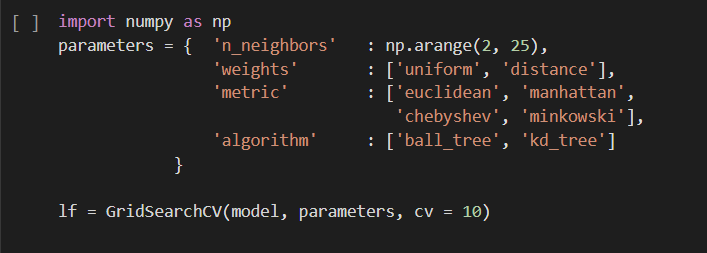


## garbage from template

In [ ]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag,urls_flag_count,retweets
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,"[(http, twitpic.com, /2y1zl)]",1,0
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,[],0,0


## importing libraries for supervised machine learning

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [ ]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC': rfc}

In [ ]:
def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ---> ", ac)

##  text classfication 

In [ ]:
dfr_feat = dfr.drop(labels=['tweets','sentiment','emails','retweets','urls_flag'],axis = 1).reset_index(drop=True)
dfr_feat


,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag_count
0,9,39,3.333333,4,0,0,0,0,0,0
1,16,88,4.437500,8,0,1,0,1,0,0
2,7,41,4.857143,0,0,1,0,0,0,0
3,25,137,4.440000,11,0,1,0,2,0,0
4,3,22,6.333333,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3995,4,36,8.000000,0,0,0,0,0,0,0
3996,10,50,4.000000,4,0,1,0,0,0,0
3997,7,53,6.571429,3,1,1,0,0,0,0
3998,5,34,5.800000,0,0,1,0,0,0,0


In [ ]:
y = dfr['sentiment']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['twitts'])

In [ ]:
text_counts.toarray().shape

In [ ]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())


In [ ]:
%%time
classify(dfr_bow, y) # bow data
classify(dfr_feat, y) # manual features
bow_feat=dfr_feat.join(dfr_bow) # extra columns are added
classify(bow_feat,y) # manual+bow
classify=(df_tfidf,y) # tf idf

In [4]:
%%shell
jupyter nbconvert barn_for_preprocessing.ipynb

3jupyter nbconvert --to html ///content/barn_for_preprocessing.ipynb.ipynb

[NbConvertApp] Converting notebook barn_for_preprocessing.ipynb to html
[NbConvertApp] Writing 1536380 bytes to barn_for_preprocessing.html
/bin/bash: line 2: 3jupyter: command not found


CalledProcessError: ignored